# Implementacja K-Fold Cross-Validation w Scikit-learn

Import wszystkich wymaganych bibliotek:

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

Import zestawu danych CSV

In [14]:
dataset = pd.read_csv('VLagun_Phys_Years3.csv')
dataset

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.00,7.5000,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.00,7.8600,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.00,8.1720,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.00,7.8480,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.00,7.5360,9.2400,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...
115,4.500000,9.93,16.3,117.50,7.0180,13.0645,8.5,3.2,1
116,4.600000,10.02,16.2,115.00,7.0905,11.4115,10.2,3.3,1
117,4.500000,9.93,16.3,113.75,7.0615,11.7595,9.5,3.4,1
118,4.200000,10.30,16.0,102.50,7.1050,12.4410,10.5,3.3,1


Lokalizujemy X i y

In [15]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

5-krotna walidacja krzyżowa

In [16]:
def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(model, X, y, scoring=_scoring, cv=_cv, return_train_score=True)
    results_dict = {
        'Training Accuracy scores': results['train_accuracy'],
        'Mean Training Accuracy': results['train_accuracy'].mean() * 100,
        'Training Precision scores': results['train_precision'],
        'Mean Training Precision': results['train_precision'].mean(),
        'Training Recall scores': results['train_recall'],
        'Mean Training Recall': results['train_recall'].mean(),
        'Training F1 scores': results['train_f1'],
        'Mean Training F1 Score': results['train_f1'].mean(),
        'Validation Accuracy scores': results['test_accuracy'],
        'Mean Validation Accuracy': results['test_accuracy'].mean() * 100,
        'Validation Precision scores': results['test_precision'],
        'Mean Validation Precision': results['test_precision'].mean(),
        'Validation Recall scores': results['test_recall'],
        'Mean Validation Recall': results['test_recall'].mean(),
        'Validation F1 scores': results['test_f1'],
        'Mean Validation F1 Score': results['test_f1'].mean(),
    }
    
    return results_dict

Uczenie modelu

In [17]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_result = cross_validation(decision_tree_model, X, y, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': np.float64(100.0), 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': np.float64(1.0), 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': np.float64(1.0), 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': np.float64(1.0), 'Validation Accuracy scores': array([0.79166667, 0.79166667, 0.75      , 0.79166667, 0.83333333]), 'Mean Validation Accuracy': np.float64(79.16666666666666), 'Validation Precision scores': array([0.71428571, 0.875     , 0.72727273, 0.75      , 0.75      ]), 'Mean Validation Precision': np.float64(0.7633116883116884), 'Validation Recall scores': array([0.90909091, 0.63636364, 0.72727273, 0.81818182, 1.        ]), 'Mean Validation Recall': np.float64(0.8181818181818181), 'Validation F1 scores': array([0.8       , 0.73684211, 0.72727273, 0.7826087 , 0.85714286]), 'Mean Validation F1 Score': np.float64

Wizualizacja wyników

In [18]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
    plt.figure(figsize=(12, 6))
    labels = ['1st Fold', '2nd Fold', '3rd Fold', '4th Fold', '5th Fold']
    X_axis = np.arange(len(labels))
    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis - 0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis + 0.2, val_data, 0.4, color='red', label='Validation')
    plt.title(plot_title, fontsize=30)
    plt.xticks(X_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)

Dokładność treningu i walidacji w każdym fałdzie (fold)

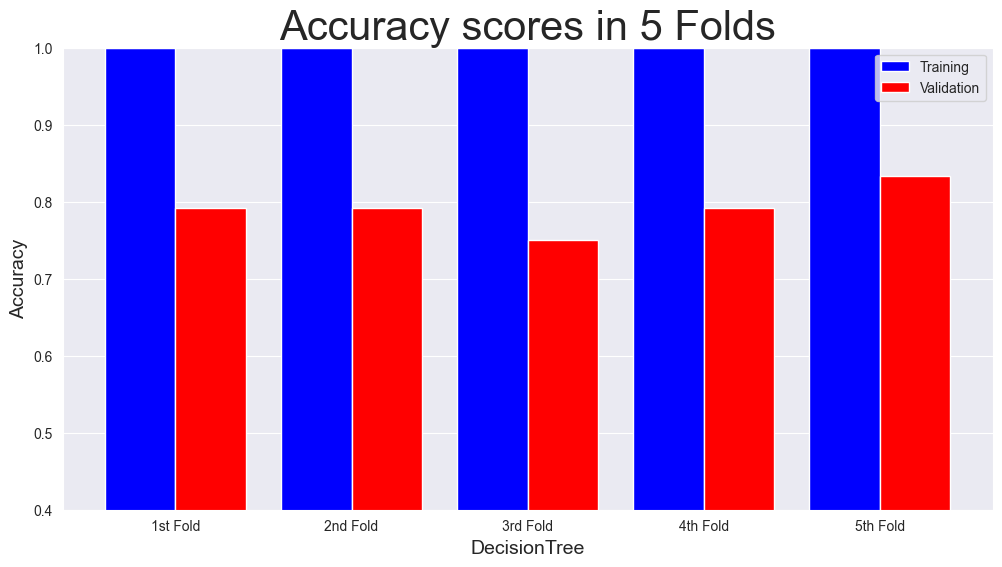

In [19]:
model_name = 'DecisionTree'
plot_result(
    model_name,
    'Accuracy',
    'Accuracy scores in 5 Folds',
    decision_tree_result['Training Accuracy scores'],
    decision_tree_result['Validation Accuracy scores']
)

Precyzja szkolenia i walidacji w każdym fold

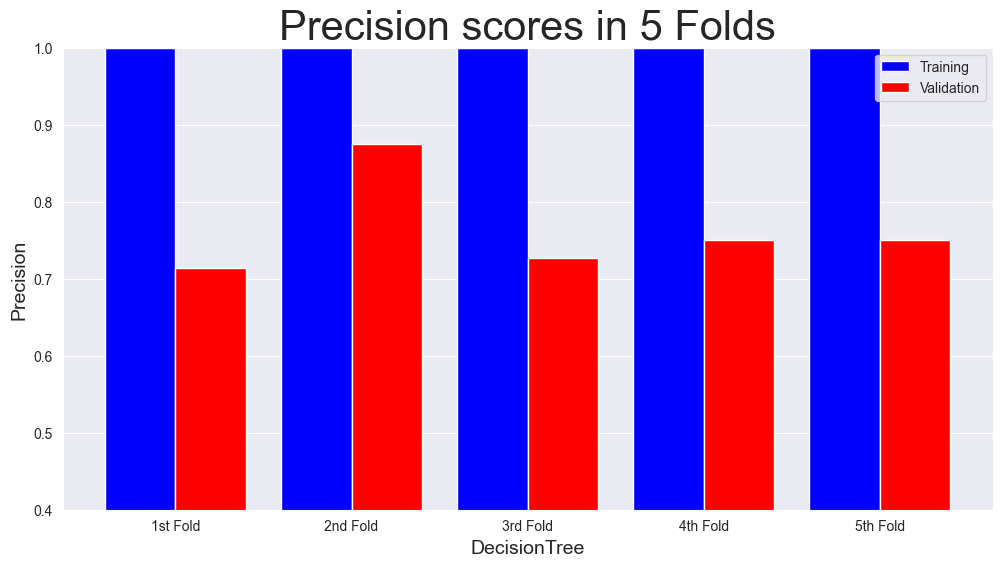

In [20]:
plot_result(
    model_name,
    'Precision',
    'Precision scores in 5 Folds',
    decision_tree_result['Training Precision scores'],
    decision_tree_result['Validation Precision scores']
)

Przypomnienie (recall) szkolenia i przypomnienie walidacji w każdym fold

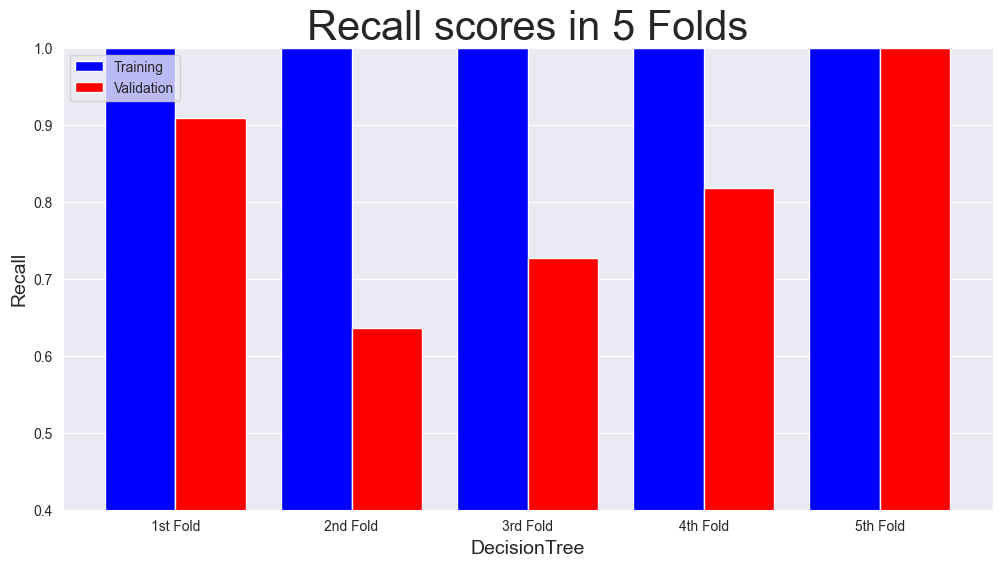

In [21]:
plot_result(
    model_name,
    'Recall',
    'Recall scores in 5 Folds',
    decision_tree_result['Training Recall scores'],
    decision_tree_result['Validation Recall scores']
)

Wynik szkolenia f1 score i wynik walidacji f1 score w każdym fold

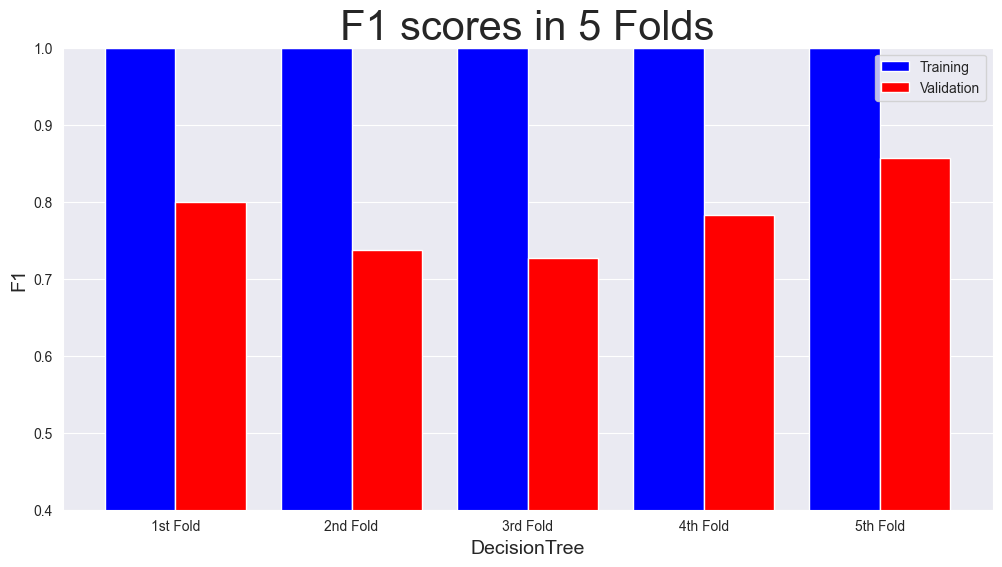

In [22]:
plot_result(
    model_name,
    'F1',
    'F1 scores in 5 Folds',
    decision_tree_result['Training F1 scores'],
    decision_tree_result['Validation F1 scores']
)